<a href="https://colab.research.google.com/github/pradeepvaranasi/ecommerce_clv/blob/main/ecommerce_clv_lifetimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


For this exercise, we’re going to predict future purchasing from a history of customer transactions.

Data represents approximately 50,000 transactions from an ecommerce store that sells widgets



In [ ]:
# installing lifetimes package
# !pip install Lifetimes==0.2.2.2

**placeholder

In [1]:
# importing libraries
import pandas as pd
from lifetimes import ModifiedBetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix, plot_probability_alive_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# importing data
data = pd.read_csv('data.csv')

In [3]:
# copying the data to dataframe df
df = data.copy()

In [4]:
# checking the first n rows
df.head(2)

,CustomerID,Timestamp,PurchaseValue
0,5611860a94204a4078659f1667372cc4,2017-02-09T18:31:00Z,4.72
1,07b260307114f9cffc5601eb7ad4b565,2017-06-28T19:26:00Z,5.33


In [5]:
# checking the shape of the dataframe
df.shape

(49945, 3)

In [6]:
# checking for duplicates
df.duplicated().sum()

0

In [7]:
# Explore basic characteristics of the data
print("Basic Data Information:")
df.info()

Basic Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49945 entries, 0 to 49944
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     49945 non-null  object 
 1   Timestamp      49945 non-null  object 
 2   PurchaseValue  49945 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


From the above, we could infer
1. There are no missing values in the data
2. There are no duplicate values in the data
3. The *Timestamp* feature should be coverted to datetime object

In [8]:
# reconfirming the missing values in the data
df.isnull().sum()

CustomerID       0
Timestamp        0
PurchaseValue    0
dtype: int64

In [9]:
# Timestamp feature conversion to datatime object
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.date
df.head(2)

,CustomerID,Timestamp,PurchaseValue
0,5611860a94204a4078659f1667372cc4,2017-02-09,4.72
1,07b260307114f9cffc5601eb7ad4b565,2017-06-28,5.33


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49945 entries, 0 to 49944
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     49945 non-null  object 
 1   Timestamp      49945 non-null  object 
 2   PurchaseValue  49945 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [11]:
# descriptive stats for the PurchaseValue feature
df['PurchaseValue'].describe()

count    49945.000000
mean       236.888196
std        245.760987
min          4.720000
25%         97.100000
50%        166.660000
75%        286.790000
max      11599.680000
Name: PurchaseValue, dtype: float64

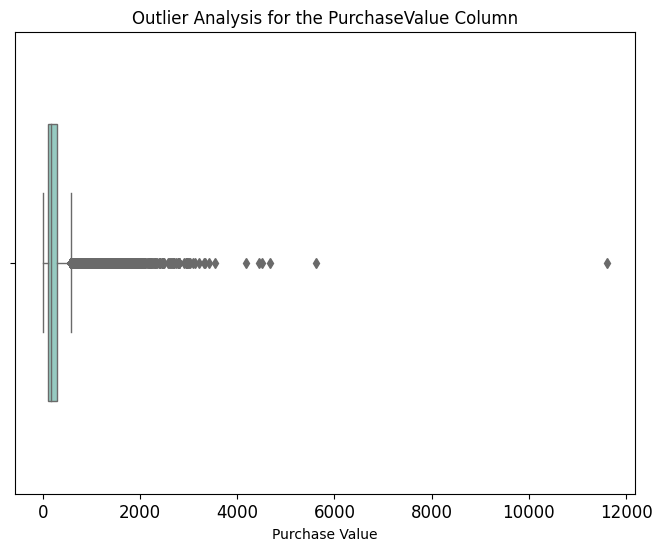

In [12]:
# Create a boxplot
plt.figure(figsize=(8, 6))  # Adjust the figure size

# Customize the color palette for better visibility
sns.set_palette("Set3")

# Increase the linewidth of the box and whiskers
sns.boxplot(x=df['PurchaseValue'], linewidth=1, width=0.6)

# Set labels and title
plt.xlabel('Purchase Value')
plt.title('Outlier Analysis for the PurchaseValue Column')

# Customize tick labels for better readability
plt.xticks(fontsize=12)

# Show the plot
plt.show()

In [13]:
df.head(2)

,CustomerID,Timestamp,PurchaseValue
0,5611860a94204a4078659f1667372cc4,2017-02-09,4.72
1,07b260307114f9cffc5601eb7ad4b565,2017-06-28,5.33


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49945 entries, 0 to 49944
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     49945 non-null  object 
 1   Timestamp      49945 non-null  object 
 2   PurchaseValue  49945 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [23]:
df['Timestamp'].max()

datetime.date(2017, 12, 6)

In [15]:
# Convert CustomerID to integer values
df['CustomerID'] = pd.factorize(df['CustomerID'])[0]

In [16]:
from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes.estimation import *

In [26]:

# Create summary data for Lifetimes

df_clv = summary_data_from_transaction_data( customer_id_col=df['CustomerID'],
                                            datetime_col=df['Timestamp'],
                                            monetary_value_col=df['PurchaseValue'],
                                            observation_period_end='2017-12-6')
df_clv.head()

TypeError: summary_data_from_transaction_data() missing 1 required positional argument: 'transactions'